In [2]:
# After discretization, the intervals of the variable can be treated as a discrete numerical
# variable, or as categories in a categorical variable. If treated as categorical, we can follow up
# the discretization by reordering the intervals according to the target value
%config Completer.use_jedi = False
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.encoding import OrdinalEncoder

In [3]:
boston_dataset = load_boston()
data = pd.DataFrame(boston_dataset.data,
columns=boston_dataset.feature_names)
data['MEDV'] = boston_dataset.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3,
random_state=0)

In [5]:
disc = EqualFrequencyDiscretiser(q=10, variables = ['LSTAT', 'DIS',
'RM'], return_object=True)

In [6]:
disc.fit(X_train)

EqualFrequencyDiscretiser(return_object=True, variables=['LSTAT', 'DIS', 'RM'])

In [7]:
train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

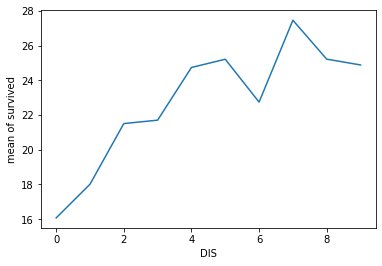

In [8]:
pd.concat([train_t, y_train],
axis=1).groupby('DIS')['MEDV'].mean().plot()
plt.ylabel('mean of survived')
plt.show()

In [10]:
enc = OrdinalEncoder(encoding_method = 'ordered')

In [11]:
enc.fit(train_t, y_train)

OrdinalEncoder(variables=['RM', 'DIS', 'LSTAT'])

In [12]:
train_t = enc.transform(train_t)
test_t = enc.transform(test_t)

In [13]:
train_t.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')